# Business Problem 
**How can the online retail company optimize its sales strategy, identify key customer segments, and improve inventory management based on historical transaction data from December 2010 to December 2011?**


Business Objectives
- Identify high-value customers for loyalty programs.
- Recognize churn-risk customers and apply re-engagement tactics.
- Improve marketing campaigns with personalized targeting.
- Optimize customer lifetime value (CLV) and revenue.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

# DATA UNDERSTANDING
**COLLECT AND LOAD THE DATA**

In [5]:
df = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\data.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


- Term | Meaning
- InvoiceNo | Unique ID for a transaction
- StockCode | Unique ID for a product
- Description | Product name
- Quantity | Number of items purchased
- InvoiceDate | Date and time of transaction
- UnitPrice | Price per unit of the item
- CustomerID | Unique ID for each customer
- Country | Country where the customer is from

In [6]:
df.shape

(541909, 8)

**"The dataset contains 541,909 rows and 8 columns."**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**"The dataset has 541,909 entries and 8 columns. Most columns have complete data, except for 'Description' and 'CustomerID', which have some missing values. The data types include 5 object (text) columns, 1 integer, and 2 float columns."**

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

**"The dataset contains object (text), integer, and float columns — with 'Quantity' as integer, 'UnitPrice' and 'CustomerID' as float, and the rest as text-based (object) types."**

In [9]:
df.columns.to_list()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

**"The dataset has 8 columns capturing invoice details, product info, quantities, pricing, customer IDs, and country-wise transactions."**

In [10]:
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

**The InvoiceNo column contains unique identifiers for each transaction, indicating individual invoices. These values are stored as strings and may represent different purchases or orders, often used to group or analyze transaction-level data.**

In [11]:
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

**The StockCode column contains product codes or item identifiers, represented as strings. These codes uniquely identify the items being sold. The variation in formats (e.g., alphanumeric like '85123A', all digits like '71053', or lowercase like '47591b') suggests a mix of standard and possibly special codes (like discounts, returns, or custom items)**










In [12]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

**The Description column contains textual product descriptions with various home decor and seasonal items. It includes potential errors like "lost," which could indicate missing or unlisted products.**

In [13]:
df['InvoiceDate'].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

**The InvoiceDate column contains date and time values in the format 'MM/DD/YYYY HH:MM', representing when the transaction occurred. The dates range from December 1, 2010, to December 9, 2011.**

In [14]:
df['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

**The UnitPrice column contains the prices of individual items, with values ranging from 2.55 to 1714.17, reflecting a wide variety of products sold in the dataset.**

In [15]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

**The CustomerID column contains unique identifiers for customers, with values like 17850, 13047, 12583, etc., representing different customers in the dataset.**

In [16]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

**The Country column contains the names of countries, such as the United Kingdom, France, Australia, USA, and Brazil, along with some unspecified entries like 'Unspecified' and 'European Community'.**

In [17]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

**The Quantity column contains the number of items purchased in each transaction. It includes positive and negative values, with positive values indicating normal purchases and negative values possibly representing returns or corrections. Some extreme values like 80995 and -80995 are also present.**

# Exploratory Data Analysis(EDA)


In [18]:
continous = ['Quantity', 'UnitPrice','CustomerID']
categorical = ['InvoiceNo', 'StockCode', 'Description', 'Country']
time_series = ['InvoiceDate']


In [19]:
df[continous].describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



- CustomerID has missing values → Remove rows without CustomerID.
- Quantity contains negative values (returns/refunds) → Filter out invalid transactions.
- InvoiceDate is stored as text → Convert it to datetime format.
- UnitPrice has extreme outliers (negative prices) → Validate & clean.**

In [20]:
df[categorical].describe()

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


**The dataset has 541,909 entries with 25,900 unique invoice numbers, 4,070 unique stock codes, 4,223 unique product descriptions, and 38 unique countries, with the most frequent values being InvoiceNo 573585, StockCode 85123A, Description "WHITE HANGING HEART T-LIGHT HOLDER", and Country "United Kingdom".**










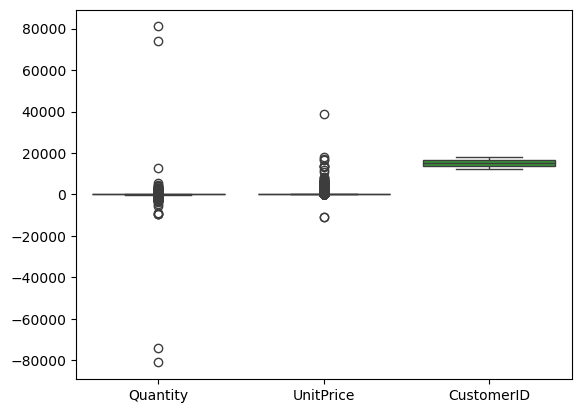

In [21]:
sns.boxplot(df[continous])
plt.show()

**The presence of outliers in the "Quantity" and "UnitPrice" columns is indicated by the boxplot. Outliers are typically represented as points outside the "whiskers" of the boxplot. These values can be unusually high or low compared to the rest of the data.**

# Data cleaning

- Handling Missing & Invalid Values → Remove missing CustomerID, fix negative transactions.
- Data Type Conversion → Convert InvoiceDate to datetime.
- Feature Engineering → Compute TotalPrice.
- Handling Infinite & NaN Values → Replace & clean infinite/missing values.
- Memory Optimization → Reduce dataset size for efficiency.

In [22]:
import numpy as np
import pandas as pd

# Drop rows with missing CustomerID
df.dropna(subset=["CustomerID"], inplace=True)

# Convert CustomerID to integer for consistency
df["CustomerID"] = df["CustomerID"].astype(int)

In [23]:
# Remove transactions with negative quantities (returns and errors)
df = df[df["Quantity"] > 0]

In [24]:
# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
# Create a new column: Total Transaction Value
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


In [25]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)



In [26]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int32         
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


In [28]:
continous = ['Quantity', 'UnitPrice','CustomerID']
df[continous].skew()

Quantity      400.811714
UnitPrice     202.750617
CustomerID      0.030195
dtype: float64

In [29]:
import numpy as np

# Apply log transformation to 'Quantity' and 'UnitPrice' to reduce skewness
df['Quantity'] = np.log1p(df['Quantity'])  # log(1 + x) to avoid log(0) errors
df['UnitPrice'] = np.log1p(df['UnitPrice'])


In [30]:
df[continous].skew()

Quantity      0.820733
UnitPrice     0.938596
CustomerID    0.030195
dtype: float64

**Monthly Revenue Trends**
- Helps detect seasonal trends in sales.
- Identifies high and low revenue months.

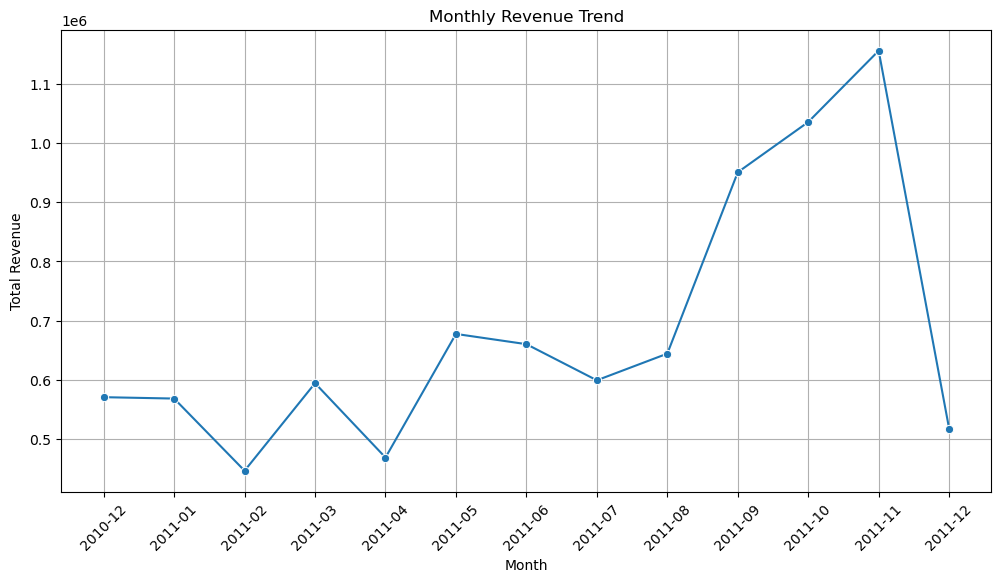

In [31]:
# Extract year-month for analysis
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Aggregate revenue by month
monthly_revenue = df.groupby("YearMonth")["TotalPrice"].sum()

# Visualization: Monthly Revenue Trend
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

- Helps understand which markets generate the most revenue.
- Supports expansion and localization strategies.

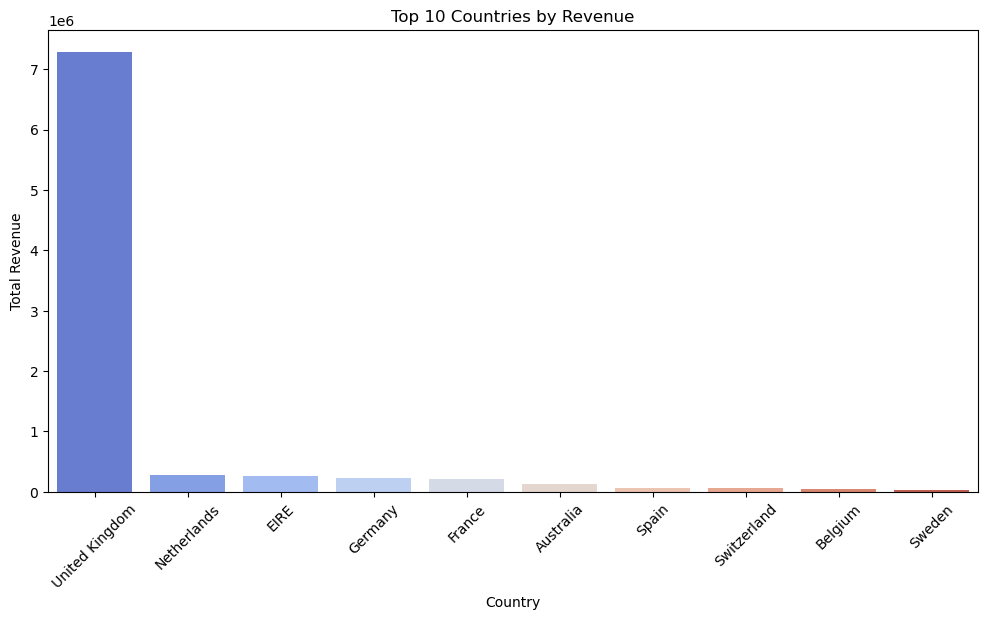

In [32]:
# Aggregate revenue by country
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# Visualization: Revenue by Country
plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.show()


**Customer Spending Distribution**
- Helps differentiate high-value customers from low-value customers.
- Supports segmentation & personalized offers.

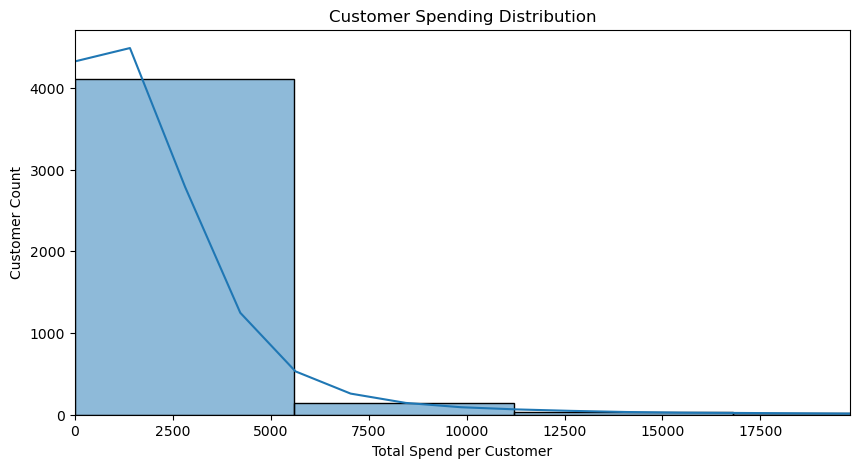

In [33]:
# Aggregate total spend per customer
customer_spend = df.groupby("CustomerID")["TotalPrice"].sum()

# Visualization: Customer Spending Distribution
plt.figure(figsize=(10,5))
sns.histplot(customer_spend, bins=50, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend per Customer")
plt.ylabel("Customer Count")
plt.xlim(0, customer_spend.quantile(0.99))  # Remove extreme outliers
plt.show()

 - Replaced generic revenue distribution with strategic analyses.

 - Added revenue trends over time to detect seasonality.

 - Included revenue by country to optimize market strategy.

 - Analyzed customer spending distribution for better segmentation.

In [34]:
# Define reference date (latest transaction date)
reference_date = df["InvoiceDate"].max()

# Compute Recency (Days Since Last Purchase), Frequency, and Monetary Value
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "TotalPrice": "sum"  # Monetary
})

# Rename columns
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Display RFM table
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,4.271952,2048.215924
std,100.009747,7.705493,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,306.455000
50%,50.000000,2.000000,668.560000
75%,141.000000,5.000000,1660.315000
max,373.000000,210.000000,280206.020000


- Key Insights from RFM Scores¶
- High Recency : Many customers have been inactive for a long time → Win-back campaigns needed.
- Low Frequency : Most customers do not make frequent purchases → Loyalty programs & retention strategies required.
- Skewed Monetary Values : A small group of VIP customers generates most revenue → High-value customer retention is critical.


- To effectively group customers into segments, we use K-Means Clustering. This helps identify patterns in customer behavior and allows businesses to personalize marketing strategies.



- Before clustering, we normalize the RFM values to ensure that no feature (e.g., Monetary) dominates the clustering process. Since RFM values are on different scales, we use StandardScaler to transform them.

In [36]:
# Normalize the RFM values
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Display first few rows
pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"]).head()

,Recency,Frequency,Monetary
0,2.334858,-0.424675,8.363977
1,-0.905199,0.354080,0.251779
2,-0.175186,-0.035297,-0.027938
3,-0.735196,-0.424675,-0.032357
4,2.174855,-0.424675,-0.190780


**Using ElbowVisualizer, we can visualize the optimal k for clustering.**

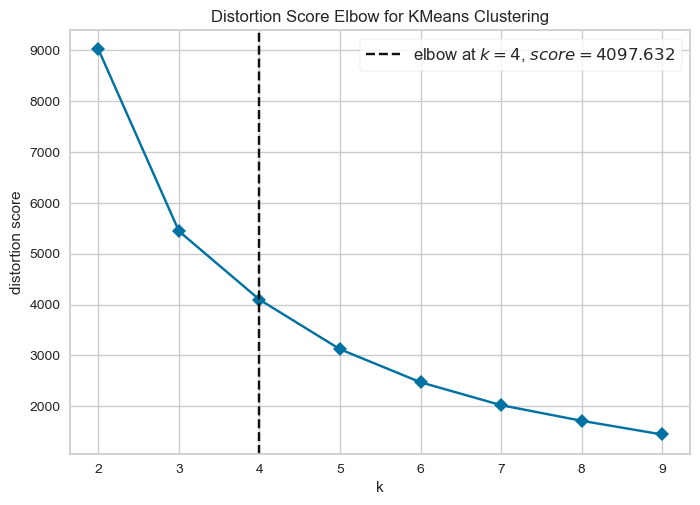

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Use Elbow Method to determine best k
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(rfm_scaled)
visualizer.show()

In [38]:
# Apply K-Means Clustering
optimal_k = 4  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Reset index for CustomerID visibility
rfm = rfm.reset_index()

# Display first few rows with assigned clusters
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,325,1,77183.60,0
1,12347,1,7,4310.00,3
2,12348,74,4,1797.24,3
3,12349,18,1,1757.55,3
4,12350,309,1,334.40,1


In [39]:
# Compute mean RFM values per cluster
rfm_avg = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)

# Display the average RFM values per segment
print("\n✅ Average RFM Values Per Segment:")
print(rfm_avg)


✅ Average RFM Values Per Segment:
         Recency  Frequency   Monetary
Cluster                               
0          14.67      22.05   12435.09
1         247.56       1.55     476.33
2           6.38      82.69  127187.96
3          42.91       3.66    1344.28


In [40]:
# Store customer IDs per segment
segment_dict = {}

for cluster in rfm["Cluster"].unique():
    segment_dict[f"Cluster_{cluster}"] = rfm[rfm["Cluster"] == cluster]["CustomerID"].tolist()

# Display first 10 customer IDs per segment
for cluster, customers in segment_dict.items():
    print(f"{cluster} - {len(customers)} Customers")
    print(customers[:10])
    print("...")

Cluster_0 - 211 Customers
[12346, 12431, 12437, 12471, 12474, 12540, 12569, 12583, 12621, 12678]
...
Cluster_3 - 3053 Customers
[12347, 12348, 12349, 12352, 12356, 12357, 12358, 12359, 12360, 12362]
...
Cluster_1 - 1062 Customers
[12350, 12353, 12354, 12355, 12361, 12365, 12373, 12377, 12383, 12386]
...
Cluster_2 - 13 Customers
[12415, 12748, 13089, 14156, 14646, 14911, 15311, 16029, 16446, 17450]
...


Each customer segment has unique characteristics that require different marketing strategies based on their behavior.

- VIP & High-Value Customers (Cluster 1):

Offer exclusive VIP rewards, premium support, and early access to sales.
Personalized offers and discounts to maintain engagement.
High-value upselling and cross-selling based on purchase history.

- Churn-Risk Customers (Cluster 2):

Implement win-back campaigns with strong incentives (special discounts, personalized re-engagement emails).
Targeted remarketing ads to encourage a return purchase.
Personalized outreach with offers tailored to their past purchases.
- Regular & Mid-Value Customers (Cluster 0):

Introduce seasonal promotions and bundled offers to increase spending.
Use loyalty incentives to encourage more frequent purchases.
Implement cross-sell and upsell strategies based on past transactions.
- Frequent Mid-Value Buyers (Cluster 3):

Encourage larger purchases with volume-based discounts and bundling deals.
Offer exclusive loyalty perks for continued engagement.
Send targeted offers based on shopping patterns to boost revenue per transaction.
This segmentation strategy enables personalized engagement, optimizes marketing efficiency, and drives revenue growth!